In [151]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [152]:
install.packages("rcompanion")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [153]:
library(rcompanion)

In [ ]:
library(pROC)

Этот проект посвящён одному из средств связи клауз в полипредикативных конструкциях в японском языке – конвербу “на -te”, его синтактике и семантике. Форма на -te – это форма деепричастия, образующаяся присоединением аффикса te к глагольной основе (например, tabe-ru ‘есть’ -> tabe-te, где -ru – показатель инфинитива). Предметом настоящего исследования является te-форма в составе полипредикативных конструкций, т.е. такие употребления, где te-форма возглавляет первую из двух (или более) соединяемых клауз.

Наша задача – собрать выборку употреблений конверба в полипредикативных конструкциях на материале параллельных текстов; в зависимости от отношения между соединяемыми клаузами распределить примеры по группам значений, сочетающихся с конвербом на -te; описать синтактику и семантику конверба как внутри каждой семантической группы, так и целиком по выборке; сделать выводы о сочетаемости с другими конвербами и типами семантической связи между конъюнктами, об аналогах в английском языке, о вариантах пунктуационной реализации, о маркировании субъекта и пр.

Прежде всего нас будет интересовать, есть ли различия в употреблениях -te с запятой и без запятой на семантическом и синтаксическом уровнях. Другими специалистами в области японского языка ([Данилов, Сыромятников 2001], [Зверев 2019]) утверждается, что нет существенных различий между вариантами пунктуационной реализации конверба - в ходе проекта мы хотим подтвердить, уточнить или опровергнуть это утверждение.

В качестве эмпирической базы исследования был выбран параллельных корпус на базе первых десяти глав романа Дж. К. Роулинг “Гарри Поттер и Философский камень” в его оригинале и японском переводе. Данные перевода полезны в отношении полисемичных единиц, таких как te-форма, и могут пролить свет на границы между различными значениями. Более того, в силу высокой сочетаемости -te с разнообразными отношениями между клаузами полипредикативной конструкции, в сопоставлении с английским оригиналом не обнаруживается точного словарного эквивалента конверба – в связи с этим представляет интерес, насколько велик и разнообразен список единиц, встретившихся в оригинальном тексте на месте -te.    

Датасет был собран вручную на базе перевода первых пяти глав романа Дж. К. Роулинг "Гарри Поттер и философский камень" на японский язык и содержит размеченные сложные предложения на японском языке, содержащие конверб на -te, и соответствующие им предложения на языке оригинала. Для начала мы рассмотрим датасет, где каждая строчка соответствует предложению, содержащему -te. Всего в датасете 226 строк.

In [154]:
data_duo <- read_csv("te_full.csv")
head(data_duo)

Rows: 226 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): base_number, japanese_text, russian_translation, english_original,...
dbl  (1): converbs_amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


base_number,japanese_text,russian_translation,english_original,converb_te_copula,converb_te_no_comma,converb_i_adjective,converb_te_comma,converb_te_period,converb_i,⋯,converb_tari,converbs_amount,types_of_converbs,direct_speech,connection_type_ja,connection_type_en,conjunction_original,lexis,subject,comments
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1-2-3,不思議とか神秘とかそんな非常識はまるっきり認めない人種で、まか不思議な出来事が彼らの周辺で起こるなんて、とうてい考えられなかった,"[Они] были такими людьми, которые абсолютно не позволили бы [произойти] такому абсурду, как странности или загадки [te], и никоим образом не смогли бы представить, что в их окружении возникнет что-то вроде большой странности.","They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.",да,нет,нет,нет,нет,нет,⋯,нет,1,ТЭ,нет,причинность,причинность,because,-,"[2 (te), (0)]",NA
1-2-7,奥さんの方はやせて、金髪で、なんと首の長さが普通の人の二倍はある。,"‘Что же касается жены, то она была худой [te], блондинкой [te], и с шеей в два раза длиннее [шеи] обычного человека.’","Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbours.",да,нет,нет,да,нет,нет,⋯,нет,2,"ТЭ, ТЭ",нет,перечисление характеристик,перечисление характеристик,and + and,-,"[2 (te), (0)]","ВА (ТЭ, ...)"
1-2-31,八時半、ダーズリー氏は鞄を持ち、奥さんの頬にちょこっとキスして、それからダドリー坊やにもバイバイのキスをしようとしたが、しそこなった。,"‘В половине девятого мистер Дурсль, держа сумку [i], коротко поцеловал жену в щёку [te], а затем попытался поцеловать на прощание и сына Дадли тоже, но промахнулся, потому что сын, разозлившись, бросил в центр стены тарелку хлопьев.’","At half past eight, Mr. Dursley picked up his briefcase, pecked Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but missed, because Dudley was now having a tantrum and throwing his cereal at the walls.",нет,нет,нет,да,нет,да,⋯,нет,2,"И, ТЭ",нет,последовательность действий,последовательность действий,запятая + and,-,"[2 (te), (0)]",NA
1-2-32,坊やがかんしゃくを起こして、コーンフレークを皿ごと壁に投げつけている最中だったからだ。,"‘...потому что сын, разозлившись [te], бросил в центр стены тарелку хлопьев.’",because Dudley was now having a tantrum and throwing his cereal at the walls.,нет,нет,нет,да,нет,нет,⋯,нет,1,ТЭ,нет,причинность,последовательность действий,and,-,"[3 (te), (0)]","ГА (ТЭ, ...)"
1-2-34,「わんぱく坊主め」ダーズリー氏は満足げに笑いながら家を出て、自家用車に乗りこみ、四番地の路地をバックで出て行った。,"“Непослушный мальчик,” – с довольным видом рассмеявшись [nagara], мистер Дурсль вышел из дома [te], сел в автомобиль [i] и выехал из переулка номер четыре.’","‘Little tyke,’ chortled Mr Dursley as he left the house. He got into his car and backed out of number four’s drive.",нет,нет,нет,да,нет,да,⋯,нет,3,"НАГАРА, ТЭ, И",нет,последовательность действий,последовательность действий,and,-,"[2 (te), (0)]","Интересно, этот прогрессив включает в сферу действия предыдущее ДЭТЭ. У меня пока нет ответа, а это важно"
1-2-39,ダーズリー氏は瞬きをして、もう一度猫をよく見なおした。,"‘Мистер Дурсль ещё раз моргнул [te], внимательно посмотрел на кошку.’",Mr Dursley blinked and stared at the cat.,нет,нет,нет,да,нет,нет,⋯,нет,1,ТЭ,нет,последовательность действий,последовательность действий,and,-,"[2 (te), (0)]",NA


Датасет содержит следующие данные:
- номер предложения в базе (номер главы-номер страницы-номер строки);
- японский текст;
- буквальный перевод на русский язык;
- оригинальный текст на английском языке;
- сведения об употреблённом в предложении конвербе (или конвербах: образован ли конверб от копулы, есть ли после него запятая или точка, употреблены ли другие японские конвербы в предложении (на -i, -nagara или -tari);
- сколько всего конвербов в цепочке в пределах одного предложения;
- какие именно конвербы и в каком порядке они употреблены в предложении;
- является ли предложение прямой речью персонажа;
- каков тип семантической связи между клаузами сложного предложения в японском языке;
- каков тип семантической связи между клаузами сложного предолжения в оригинальном тексте;
- какая единица выступает аналогом te-формы в оригинальном тексте;
- есть ли в японском языке лексические единицы, дополнительно усиливающие связь между клаузами;
- как маркирован субъект в японском тексте (показателем топика "2" или номинатива "3", односубъектное или разносубъектное употребление конверба);
- какие-либо дополнительные комментарии.


In [155]:
glimpse(data_duo)

Rows: 226
Columns: 21
$ base_number          <chr> "1-2-3", "1-2-7", "1-2-31", "1-2-32", "1-2-34", "…
$ japanese_text        <chr> "不思議とか神秘とかそんな非常識はまるっきり認めない人種で、まか不思議な出来事が彼らの周辺で起こる…
$ russian_translation  <chr> "[Они] были такими людьми, которые абсолютно не п…
$ english_original     <chr> "They were the last people you’d expect to be inv…
$ converb_te_copula    <chr> "да", "да", "нет", "нет", "нет", "нет", "нет", "н…
$ converb_te_no_comma  <chr> "нет", "нет", "нет", "нет", "нет", "нет", "да", "…
$ converb_i_adjective  <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converb_te_comma     <chr> "нет", "да", "да", "да", "да", "да", "нет", "нет"…
$ converb_te_period    <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converb_i            <chr> "нет", "нет", "да", "нет", "да", "нет", "да", "не…
$ converb_nagara       <chr> "нет", "нет", "нет", "нет", "да", "нет", "нет", "…
$ converb_tari         <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converbs_amount 

Подготовим датасет к анализу, очистив от лишних столбцов, избавившись от пропущенных значений и заменив текстовые переменные "да" и "нет" числовыми "1" и "0".

In [156]:
data_duo <- data_duo %>% select(-`comments`)

In [157]:
data_duo[is.na(data_duo)] <- "-"

In [158]:
data_duo <- data_duo %>%
  mutate(across(c(`converb_te_copula`, `converb_te_no_comma`, `converb_i_adjective`,
                `converb_te_comma`, `converb_te_period`,
                `converb_i`, `converb_nagara`, `converb_tari`),
              ~ case_when(
                . == "да" ~ 1,
                . == "нет" ~ 0,
                TRUE ~ as.numeric(.)
              )))

Warning message:
“There were 8 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 remaining warnings.”


# Качественный анализ

Для начала посмотрим на то, с какими семантическими отношениями между конъюнктами сочетается -te. Через плюс перечислены отношения для тех примеров, где в пределах предложения наблюдается несколько форм на -te с разной семантикой связи. Результат показывает, что некоторые сочетания среди нашей выборки не встретились - например, последовательность действий и перечисление характеристик - однако не исключает, что подобные сочетания допустимы.

In [159]:
connection_type <- data_duo %>%
  count(`connection_type_ja`, name = "frequency") %>%
  mutate(percentage = round(frequency / sum(frequency) * 100, 1)) %>%
  arrange(desc(percentage))
connection_type

connection_type_ja,frequency,percentage
<chr>,<int>,<dbl>
последовательность действий,81,35.8
образ действия,78,34.5
перечисление характеристик,20,8.8
причинность,19,8.4
фон-фигура,15,6.6
образ действия + последовательность действий,3,1.3
фон-фигура + последовательность действий,3,1.3
последовательность действий + образ действия,2,0.9
дискурсивный обрыв + образ действия,1,0.4


В пределах одного предложения встречается от одного до шести конвербов, образующих цепочку. Чаще всего в сложном предложении только один конверб на -te, примеры с цепочками составляют меньшую часть выборки.


In [160]:
converbs_stat <- data_duo %>%
  count(`converbs_amount`, name = "frequency") %>%
  mutate(percentage = round(frequency / sum(frequency) * 100, 1)) %>%
  arrange(desc(percentage))
converbs_stat

converbs_amount,frequency,percentage
<dbl>,<int>,<dbl>
1,156,69.0
2,55,24.3
3,12,5.3
4,2,0.9
6,1,0.4


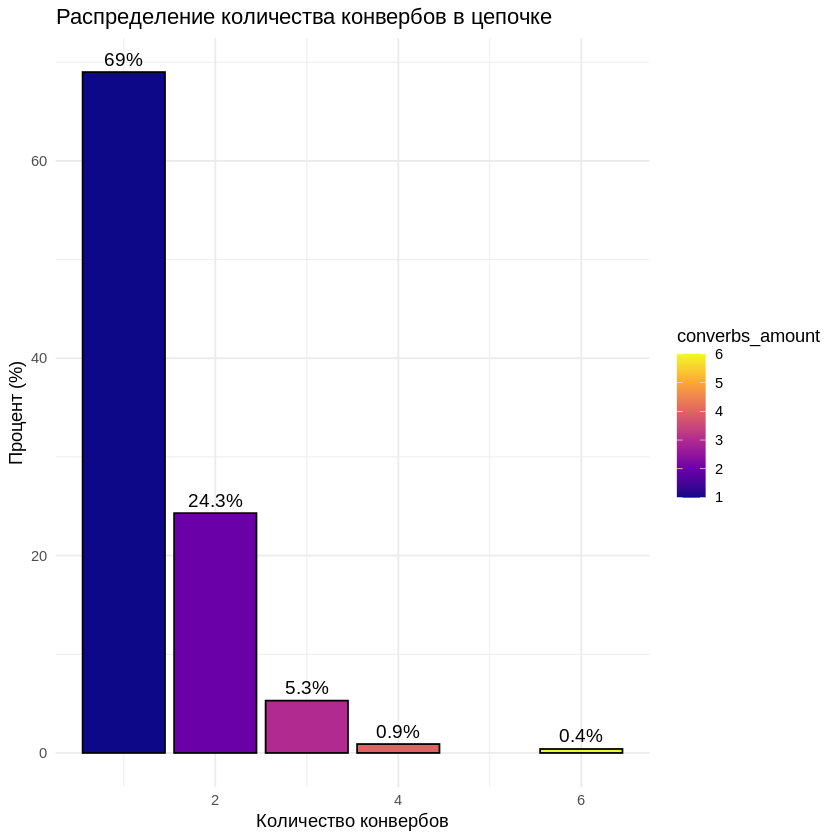

In [161]:
ggplot(converbs_stat, aes(x = converbs_amount, y = percentage, fill = converbs_amount)) +
  geom_col(color = "black") +
  geom_text(aes(label = paste0(percentage, "%")), vjust = -0.5, size = 4) +
  labs(title = "Распределение количества конвербов в цепочке",
       x = "Количество конвербов",
       y = "Процент (%)") +
  theme_minimal() +
  scale_fill_viridis_c(option = "plasma")

Ниже представлены сведения о сочетаемости различных конвербов в пределах одного предложения внутри цепочек. Чаще всего -te употребляется вместе со схожим по функциям, но традиционно считающимся более книжным конвербом на -i, и конвербом со значением одновременности на -nagara. Предложение с цепочкой из шести конвербов состоит из пяти конвербов со значением репрезентативности на -tari.

In [162]:
top_converbs <- data_duo %>%
  count(`types_of_converbs`, name = "frequency") %>%
  arrange(desc(frequency))

top_converbs <- top_converbs %>%
  mutate(
    `Доля, %` = round(frequency / sum(frequency) * 100, 1)
  )
top_converbs

types_of_converbs,frequency,"Доля, %"
<chr>,<int>,<dbl>
ТЭ,156,69.0
"И, ТЭ",22,9.7
"ТЭ, ТЭ",18,8.0
"ТЭ, И",9,4.0
"ТЭ, НАГАРА",5,2.2
"И, И, ТЭ",3,1.3
"И, ТЭ, И",2,0.9
"ТЭ, ТЭ, И",2,0.9
"И, И, ТЭ, И",1,0.4


Как показывает статистика, -te без запятой частотнее -te с запятой и составляет более 50% всех употреблений конверба. Употребления te-формы с эллипсисом главной клаузы редки, но не невозможны.

In [163]:
stats <- data_duo %>%
  mutate(converb = case_when(
    `converb_te_period` == 1 ~ "converb_te_period",
    `converb_te_comma` == 1 ~ "converb_te_comma",
    `converb_te_no_comma` == 1 ~ "converb_te_no_comma",
    `converb_te_copula` == 1 ~ "converb_te_copula",
    TRUE ~ "others"
  )) %>%
  count(converb, name = "count") %>%
  mutate(
    `percentage, %` = round(count / sum(count) * 100, 1)
  ) %>%
  arrange(desc(count))
stats

converb,count,"percentage, %"
<chr>,<int>,<dbl>
converb_te_no_comma,117,51.8
converb_te_comma,91,40.3
converb_te_copula,9,4.0
others,7,3.1
converb_te_period,2,0.9


Статистика по количеству примеров, где te-форма содержится в прямой речи персонажа. Диалогические контексты составили лишь 11.5% выборки.

In [164]:
speech_stats <- data_duo %>%
  count(`direct_speech`, name = "count") %>%
  mutate(
    `percentage, %` = round(count / sum(count) * 100, 1)
  ) %>%
  arrange(desc(count))
speech_stats

direct_speech,count,"percentage, %"
<chr>,<int>,<dbl>
нет,200,88.5
да,26,11.5


Статистика по единицам в оригинальном тексте, являющихся аналогами -te. Из результатов видно, что разнообразие аналогов -te велико: на месте конверба в английском тексте встретилось 39 различных единиц.

In [165]:
union_stats <- data_duo %>%
  count(`conjunction_original`, name = "count") %>%
  mutate(
    `percentage, %` = round(count / sum(count) * 100, 1)
  ) %>%
  arrange(desc(count))
union_stats

conjunction_original,count,"percentage, %"
<chr>,<int>,<dbl>
and,61,27.0
-,33,14.6
prep,33,14.6
ing,21,9.3
to,12,5.3
запятая,11,4.9
ed,7,3.1
as,5,2.2
and + and,4,1.8


Статистика по маркированию субъекта.

Условные обозначения:
- [2 (te), (0)] - у клауз общий субъект, маркированный показателем топика и расположенный линейно слева;
- [3 (te), (0)] - у клауз общий субъект, маркированный показателем номинатива и расположенный линейно слева;
- [(te), (2)] - у клауз общий субъект, маркированный показателем топика и расположенный линейно справа (в главной клаузе);
- [(te), (3)] - у клауз общий субъект, маркированный показателем номинатива и расположенный линейно справа (в главной клаузе);
- [(2 te), (3)] и прочие вариации - разносубъектное употребление, у клаузы с te наблюдается собственное подлежащее.

Всего допустимо десять различных вариантов маркирования субъекта.

In [166]:
subject_stats <- data_duo %>%
  count(`subject`, name = "count") %>%
  mutate(
    `percentage, %` = round(count / sum(count) * 100, 1)
  ) %>%
  arrange(desc(count))
subject_stats

subject,count,"percentage, %"
<chr>,<int>,<dbl>
"[2 (te), (0)]",127,56.2
"[3 (te), (0)]",52,23.0
"[(te), (2)]",13,5.8
"[(3 te), (2)]",10,4.4
"[(2 te), (3)]",7,3.1
"[(0 te), (3)]",6,2.7
"[(3 te), (3)]",6,2.7
"[(2 te), (2)]",2,0.9
"[(te), (3)]",2,0.9


# Количественный анализ

Теперь рассмотрим датасет, где каждая строчка соответствует единственному вхождению конверба. Выполним для него аналогичную предварительную обработку.

In [167]:
data_one <- read_csv("te_uno.csv")
head(data_one)

Rows: 248 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (20): base_number, japanese_text, russian_translation, english_original,...
dbl  (1): converbs_amount

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


base_number,japanese_text,russian_translation,english_original,converb_te_copula,converb_te_no_comma,converb_i_adjective,converb_te_comma,converb_te_period,converb_i,⋯,converb_tari,converbs_amount,types_of_converbs,direct_speech,connection_type_ja,connection_type_en,conjunction_original,lexis,subject,comments
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1-2-3,不思議とか神秘とかそんな非常識はまるっきり認めない人種で、まか不思議な出来事が彼らの周辺で起こるなんて、とうてい考えられなかった,"[Они] были такими людьми, которые абсолютно не позволили бы [произойти] такому абсурду, как странности или загадки [te], и никоим образом не смогли бы представить, что в их окружении возникнет что-то вроде большой странности.","They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense.",да,нет,нет,нет,нет,нет,⋯,нет,1,ТЭ,нет,причинность,причинность,because,-,"[2 (te), (0)]",NA
1-2-7(1),奥さんの方はやせて、金髪で、なんと首の長さが普通の人の二倍はある。,"‘Что же касается жены, то она была худой [te], блондинкой [te], и с шеей в два раза длиннее [шеи] обычного человека.’","Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbours.",нет,нет,нет,да,нет,нет,⋯,нет,1,ТЭ,нет,перечисление характеристик,перечисление характеристик,and,-,"[2 (te), (0)]","ВА (ТЭ, ...)"
1-2-7(2),奥さんの方はやせて、金髪で、なんと首の長さが普通の人の二倍はある。,"‘Что же касается жены, то она была худой [te], блондинкой [te], и с шеей в два раза длиннее [шеи] обычного человека.’","Mrs Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbours.",да,нет,нет,нет,нет,нет,⋯,нет,1,ТЭ,нет,перечисление характеристик,перечисление характеристик,and,-,"[2 (te), (0)]",NA
1-2-31,八時半、ダーズリー氏は鞄を持ち、奥さんの頬にちょこっとキスして、それからダドリー坊やにもバイバイのキスをしようとしたが、しそこなった。,"‘В половине девятого мистер Дурсль, держа сумку [i], коротко поцеловал жену в щёку [te], а затем попытался поцеловать на прощание и сына Дадли тоже, но промахнулся, потому что сын, разозлившись, бросил в центр стены тарелку хлопьев.’","At half past eight, Mr. Dursley picked up his briefcase, pecked Mrs. Dursley on the cheek, and tried to kiss Dudley good-bye but missed, because Dudley was now having a tantrum and throwing his cereal at the walls.",нет,нет,нет,да,нет,да,⋯,нет,2,"И, ТЭ",нет,последовательность действий,последовательность действий,and,-,"[2 (te), (0)]",NA
1-2-32,坊やがかんしゃくを起こして、コーンフレークを皿ごと壁に投げつけている最中だったからだ。,"‘...потому что сын, разозлившись [te], бросил в центр стены тарелку хлопьев.’",because Dudley was now having a tantrum and throwing his cereal at the walls.,нет,нет,нет,да,нет,нет,⋯,нет,1,ТЭ,нет,причинность,последовательность действий,and,-,"[3 (te), (0)]","ГА (ТЭ, ...)"
1-2-34,「わんぱく坊主め」ダーズリー氏は満足げに笑いながら家を出て、自家用車に乗りこみ、四番地の路地をバックで出て行った。,"“Непослушный мальчик,” – с довольным видом рассмеявшись [nagara], мистер Дурсль вышел из дома [te], сел в автомобиль [i] и выехал из переулка номер четыре.’","‘Little tyke,’ chortled Mr Dursley as he left the house. He got into his car and backed out of number four’s drive.",нет,нет,нет,да,нет,да,⋯,нет,3,"НАГАРА, ТЭ, И",нет,последовательность действий,последовательность действий,and,-,"[2 (te), (0)]","Интересно, этот прогрессив включает в сферу действия предыдущее ДЭТЭ. У меня пока нет ответа, а это важно"


In [168]:
data_one <- data_one %>% select(-`comments`)
data_one[is.na(data_one)] <- "-"
glimpse(data_one)

Rows: 248
Columns: 20
$ base_number          <chr> "1-2-3", "1-2-7(1)", "1-2-7(2)", "1-2-31", "1-2-3…
$ japanese_text        <chr> "不思議とか神秘とかそんな非常識はまるっきり認めない人種で、まか不思議な出来事が彼らの周辺で起こる…
$ russian_translation  <chr> "[Они] были такими людьми, которые абсолютно не п…
$ english_original     <chr> "They were the last people you’d expect to be inv…
$ converb_te_copula    <chr> "да", "нет", "да", "нет", "нет", "нет", "нет", "н…
$ converb_te_no_comma  <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converb_i_adjective  <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converb_te_comma     <chr> "нет", "да", "нет", "да", "да", "да", "да", "нет"…
$ converb_te_period    <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converb_i            <chr> "нет", "нет", "нет", "да", "нет", "да", "нет", "д…
$ converb_nagara       <chr> "нет", "нет", "нет", "нет", "нет", "да", "нет", "…
$ converb_tari         <chr> "нет", "нет", "нет", "нет", "нет", "нет", "нет", …
$ converbs_amount 

Теперь, когда каждое -te представлено отдельно, посмотрим на статистику типов связи по шести основным категориям. Самые частотные типы связи, сочетающиеся с te-формой - это последовательность действий и образ действия, составившиеся 38.3% и 35.5% выборки соответственно. Перечисление характеристик, причинность и фон-фигура встретились примерно в 20 вхождениях. Примеры с дискурсивным обрывом составляют менее 1% выборки.

In [169]:
connection_type <- data_one %>%
  count(`connection_type_ja`, name = "frequency") %>%
  mutate(percentage = round(frequency / sum(frequency) * 100, 1)) %>%
  arrange(desc(percentage))
connection_type

connection_type_ja,frequency,percentage
<chr>,<int>,<dbl>
последовательность действий,95,38.3
образ действия,88,35.5
перечисление характеристик,23,9.3
причинность,20,8.1
фон-фигура,20,8.1
дискурсивный обрыв,2,0.8


In [170]:
connection_type$connection_type_ja <- fct_reorder(connection_type$connection_type_ja,
                                                  connection_type$percentage,
                                                  .desc = TRUE)

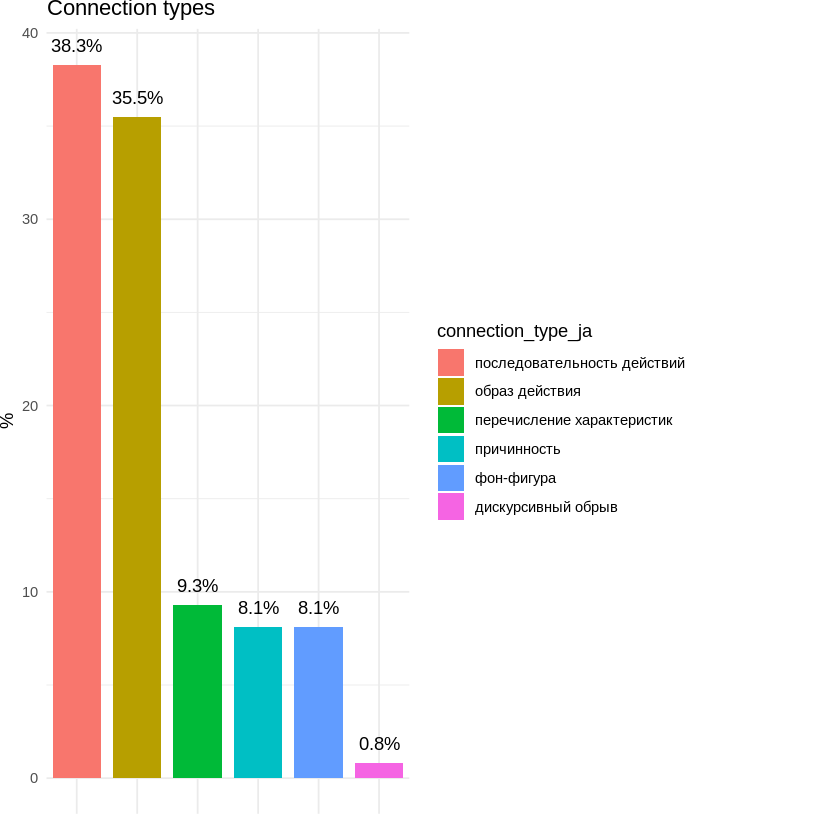

In [171]:
ggplot(connection_type,
       aes(x = `connection_type_ja`, y = percentage, fill = `connection_type_ja`)) +
  geom_col(width = 0.8) +
  scale_x_discrete(expand = expansion(mult = c(0.1, 0.1))) +
  geom_text(aes(label = paste0(percentage, "%")), vjust = -1) +
  labs(title = "Connection types", x = "", y = "%") +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),
    plot.margin = margin(r = 5, unit = "cm")
  )

Что касается статистики распределения конвербов, в 77.8% примеров te-форма встречается в одиночном виде. Наиболее частотные сочетания -te с другими конвербами: И, ТЭ (9.3%) и ТЭ, И (5.6%), что свидетельствует о склонности формы на -i появляться в предложении линейно левее -te. Также распространены употребления te-формы с конвербом одновременности на -nagara.

In [172]:
top_converbs <- data_one %>%
  count(`types_of_converbs`, name = "frequency") %>%
  arrange(desc(frequency))

top_converbs <- top_converbs %>%
  mutate(
    `percentage, %` = round(frequency / sum(frequency) * 100, 1)
  )
top_converbs

types_of_converbs,frequency,"percentage, %"
<chr>,<int>,<dbl>
ТЭ,193,77.8
"И, ТЭ",23,9.3
"ТЭ, И",14,5.6
"ТЭ, НАГАРА",6,2.4
"И, И, ТЭ",3,1.2
"И, ТЭ, И",2,0.8
"И, И, ТЭ, И",1,0.4
"И, ТЭ, И, НАГАРА",1,0.4
"НАГАРА, ТЭ",1,0.4


In [173]:
data_one <- data_one %>%
  mutate(across(c(`converb_te_copula`, `converb_te_no_comma`, `converb_i_adjective`,
                `converb_te_comma`, `converb_te_period`,
                `converb_i`, `converb_nagara`, `converb_tari`),
              ~ case_when(
                . == "да" ~ 1,
                . == "нет" ~ 0,
                TRUE ~ as.numeric(.)
              )))

Warning message:
“There were 8 warnings in `mutate()`.
The first warning was:
ℹ In argument: `across(...)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 7 remaining warnings.”


Употребления конверба без запятой составили 54.4% выборки, употребления с запятой - 39.1%, употребления от связки - 5.6%, заключительные употребления - меньше процента.

In [174]:
stats <- data_one %>%
  mutate(converb = case_when(
    `converb_te_period` == 1 ~ "converb_te_period",
    `converb_te_comma` == 1 ~ "converb_te_comma",
    `converb_te_no_comma` == 1 ~ "converb_te_no_comma",
    `converb_te_copula` == 1 ~ "converb_te_copula",
    TRUE ~ "others"
  )) %>%
  count(converb, name = "count") %>%
  mutate(
    `percentage, %` = round(count / sum(count) * 100, 1)
  ) %>%
  arrange(desc(count))
stats

converb,count,"percentage, %"
<chr>,<int>,<dbl>
converb_te_no_comma,135,54.4
converb_te_comma,97,39.1
converb_te_copula,14,5.6
converb_te_period,2,0.8


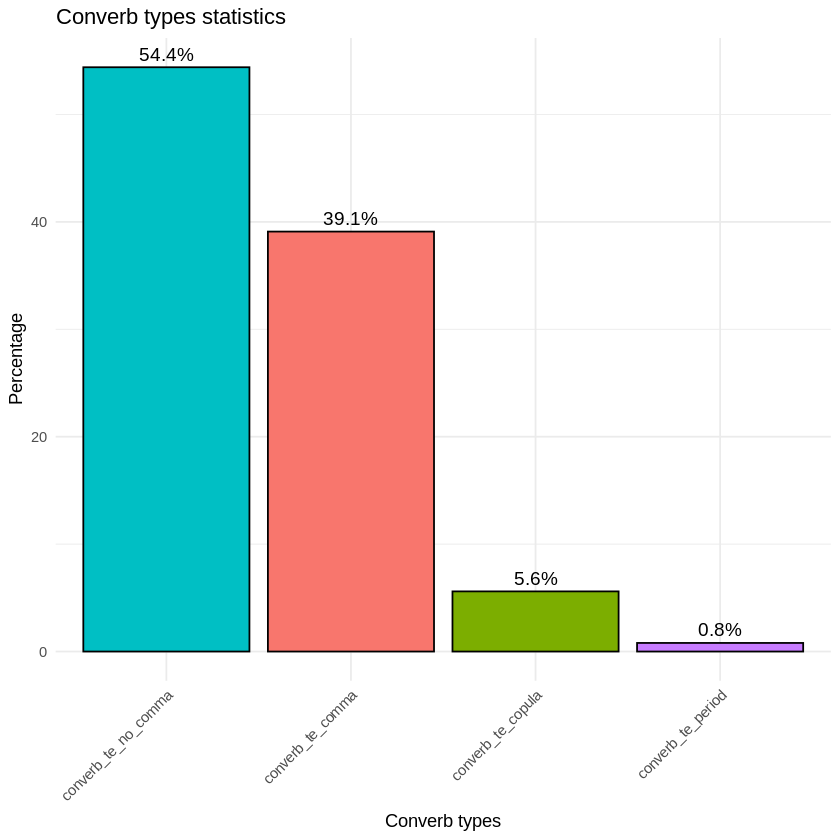

In [175]:
ggplot(stats, aes(x = fct_reorder(converb, -count), y = `percentage, %`, fill = converb)) +
  geom_col(color = "black") +
  geom_text(aes(label = paste0(`percentage, %`, "%")), vjust = -0.5, size = 4) +
  labs(title = "Converb types statistics",
       x = "Converb types",
       y = "Percentage") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        legend.position = "none")

Из аналогов -te в оригинальном тексте самыми частотными оказываются союз and (29.8%), отсутствие полипредикации (14.9%), предложные группы (14.9%) и нефинитная форма на -ing (8.9%). Подавляющее большинство аналогов, однако, встречается в выборке в единственных экземпляров.

In [176]:
union_stats <- data_one %>%
  count(`conjunction_original`, name = "count") %>%
  mutate(
    `percentage, %` = round(count / sum(count) * 100, 1)
  ) %>%
  arrange(desc(count))
union_stats

conjunction_original,count,"percentage, %"
<chr>,<int>,<dbl>
and,74,29.8
-,37,14.9
prep,37,14.9
ing,22,8.9
запятая,16,6.5
to,13,5.2
ed,8,3.2
as,6,2.4
adv,4,1.6


Проведём Х-квадрат тест на связь между семантикой связи и типом пунктуационной реализации конверба - te-форма с запятой или без. Х-квадрат был выбран в силу того, что в проекте изучается многоклассовая семантика на таблицах сопряжённости для пар переменных.

Нулевая гипотеза: нет корреляции между семантикой связи и типом конверба.

Альтернативная гипотеза: есть корреляция между семантикой связи и типом конверба.

Также избавимся от классов, в которые попадает меньше процента данных, чтобы матрица не получилась разреженной и класссы были более сбалансированы.

In [177]:
threshold <- nrow(data_one) * 0.01
valid_connection_types <- data_one %>%
  count(connection_type_ja) %>%
  filter(n >= threshold) %>%
  pull(connection_type_ja)

In [178]:
data_filtered <- data_one %>%
  mutate(
    converb_type = case_when(
      converb_te_no_comma == 1 ~ "te_no_comma",
      converb_te_comma == 1 ~ "te_comma",
      converb_te_copula == 1 ~ "te_copula",
      converb_te_period == 1 ~ "te_period",
      TRUE ~ NA_character_
    )
  ) %>%
  filter(
    !is.na(converb_type),
    connection_type_ja %in% valid_connection_types
  ) %>%
  group_by(converb_type) %>%
  filter(n() >= threshold) %>%
  ungroup() %>%
  droplevels()

Составим таблицу сопряжённости между типами пунктуационной реализации конверба и типом отношения между конъюнктами.

In [179]:
contingency_table <- table(
  data_filtered$connection_type_ja,
  data_filtered$converb_type
)
contingency_table

                             
                              te_comma te_copula te_no_comma
  образ действия                    15         1          72
  перечисление характеристик         5         8          10
  последовательность действий       53         1          41
  причинность                        7         1          12
  фон-фигура                        17         3           0

p-value < 0.05, значит, корреляция статистически значима и нулевая гипотеза отвергается, то есть существует статистически значимая связь между типом конверба и типом связи клауз. Так, -te без запятой и образ действия встречаются сильно чаще ожидаемого (+48).

In [180]:
chisq.test(as.matrix(contingency_table[, -1]))

Warning message in chisq.test(as.matrix(contingency_table[, -1])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  as.matrix(contingency_table[, -1])
X-squared = 62.898, df = 4, p-value = 7.131e-13


Коэффицент Крамера показывает, что наблюдается умеренно сильная связь между типом конверба и типом связи клауз.

In [181]:
cramerV(contingency_table)

Cramer V 
  0.4504

In [182]:
residuals_df <- as.data.frame.table(residuals(chisq.test(contingency_table)))

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


Корреляционная матрица демонстрирует, что связь между конвербом от связки и отношением перечисления характеристик сильно выше ожидаемой. Другие сильные корреляции: отношение фон-фигура и -te с запятой и отношение образа действия и -te без запятой.

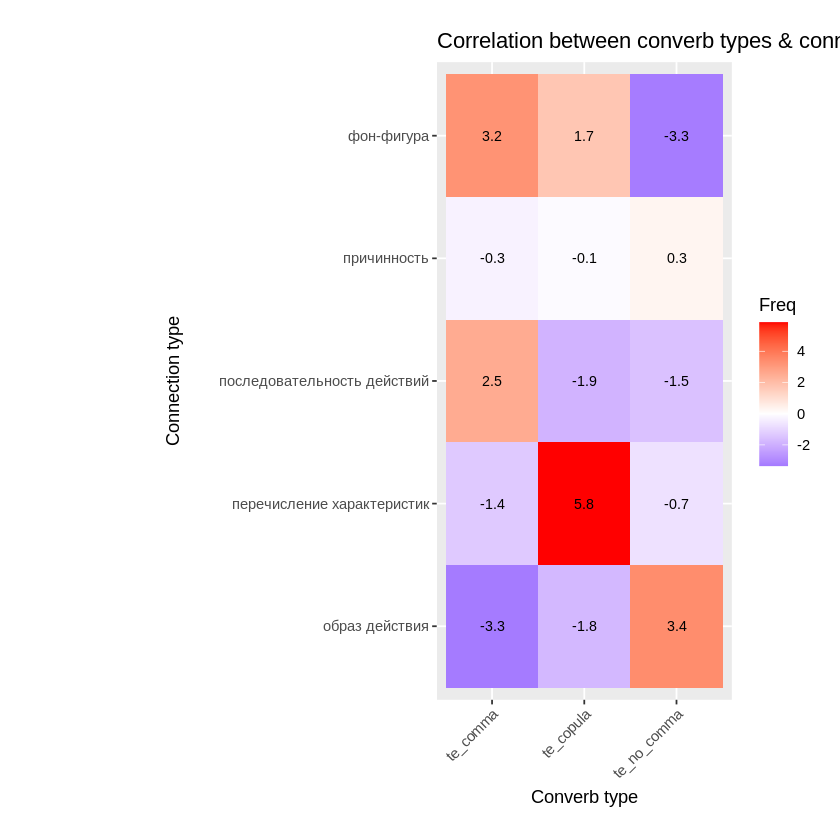

In [183]:
ggplot(residuals_df, aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white") +
  geom_text(aes(label = round(Freq, 1)), size = 3) +
  labs(title = "Correlation between converb types & connection types",
       x = "Converb type",
       y = "Connection type") +
  theme(
  axis.text.x = element_text(angle = 45, hjust = 1),
  axis.title.y = element_text(margin = margin(r = 80)),
  plot.margin = margin(l = 100, r = 10, t = 20, b = 20, unit = "pt")
)

Теперь посмотрим на корреляцию между типами конверба и их аналогами в оригинальном тексте. Проведём аналогичный Х-квадрат тест, чтобы выяснить, есть ли связь между пунктуационными реализациями te-формы и соответствующим им единицам в английском языке.

In [184]:
valid_conjunctions <- data_one %>%
  count(conjunction_original) %>%
  filter(n >= threshold) %>%
  pull(conjunction_original)

Также проведём фильтрацию, оставив только те единицы в английском тексте, которые часто соответствуют одному из вариантов -te.

In [185]:
data_filtered <- data_one %>%
  mutate(
    converb_type = case_when(
      converb_te_no_comma == 1 ~ "te_no_comma",
      converb_te_comma == 1 ~ "te_comma",
      converb_te_copula == 1 ~ "te_copula",
      converb_te_period == 1 ~ "te_period",
      TRUE ~ NA_character_
    )
  ) %>%
  filter(
    !is.na(converb_type),
    conjunction_original %in% valid_conjunctions
  ) %>%
  group_by(converb_type) %>%
  filter(n() >= threshold) %>%
  ungroup() %>%
  droplevels()

In [186]:
contingency_table <- table(
  data_filtered$conjunction_original,
  data_filtered$converb_type
)
contingency_table

         
          te_comma te_copula te_no_comma
  -             17         3          17
  , and          2         0           1
  adv            2         0           2
  and           38         4          32
  as             5         1           0
  ed             1         0           7
  ing            6         0          16
  prep           2         1          34
  to             3         0          10
  when           2         0           1
  запятая        6         3           7

Как показал Х-квадрат тест, существует связь между единицей на месте -te в оригинале и выбранным переводчиком типом -te, но достаточно умеренная.

In [187]:
chisq.test(as.matrix(contingency_table[, -1]))

Warning message in chisq.test(as.matrix(contingency_table[, -1])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  as.matrix(contingency_table[, -1])
X-squared = 22.656, df = 10, p-value = 0.01209


Коэффицент Крамера также указывает, что связь между типом конверба и соответствующим ему аналогом в английском языке есть, но не сильно выраженная.

In [188]:
cramerV(contingency_table)

Cramer V 
    0.34

In [189]:
residuals_df <- as.data.frame.table(residuals(chisq.test(contingency_table)))

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


Корреляционная матрица демонстрирует, что чаще всего предложные конструкции соответствуют -te без запятой и, наоборот, крайне редко встречаются с -te с запятой. Также можно отметить корреляцию между запятой в оригинале и конвербу от связки в японском тексте.

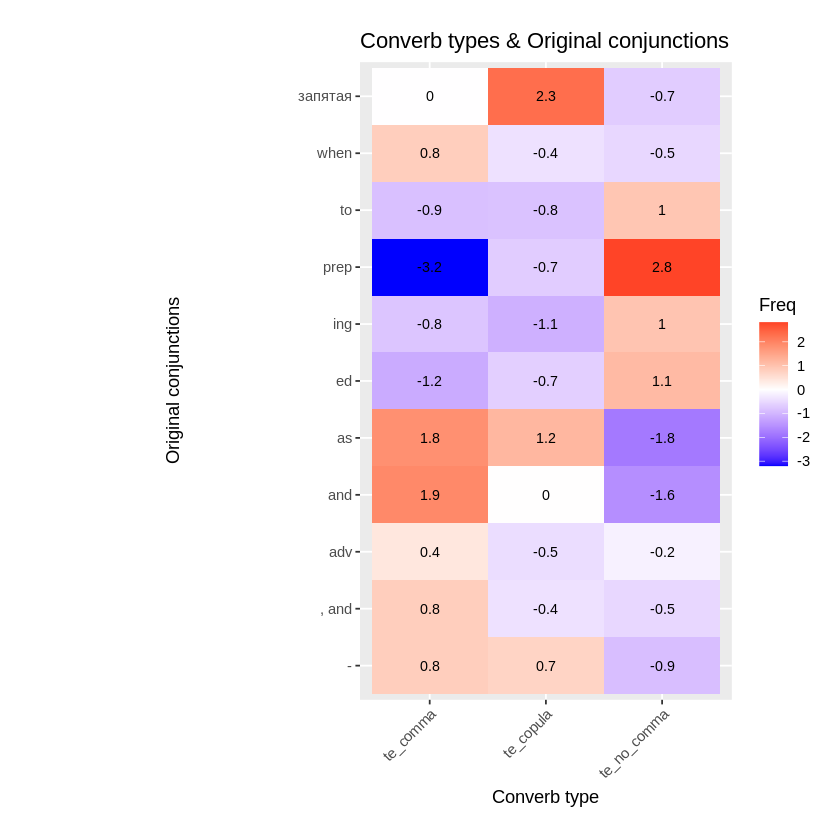

In [190]:
ggplot(residuals_df, aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white") +
  geom_text(aes(label = round(Freq, 1)), size = 3) +
  labs(title = "Converb types & Original conjunctions",
       x = "Converb type",
       y = "Original conjunctions") +
  theme(
  axis.text.x = element_text(angle = 45, hjust = 1),
  axis.title.y = element_text(margin = margin(r = 80)),
  plot.margin = margin(l = 100, r = 10, t = 20, b = 20, unit = "pt")
)

Аналогичным образом проанализируем связь между типом маркирования подлежащего и типом конверба. Из десяти возможных вариантов маркирования оставим три наиболее частотных для меньшего дисбаланса классов, установив порог в 5%.

In [191]:
threshold <- nrow(data_one) * 0.05

In [192]:
valid_subject_types <- data_one %>%
  count(subject) %>%
  filter(n >= threshold) %>%
  pull(subject)

In [193]:
data_filtered <- data_one %>%
  mutate(
    converb_type = case_when(
      converb_te_no_comma == 1 ~ "te_no_comma",
      converb_te_comma == 1 ~ "te_comma",
      converb_te_copula == 1 ~ "te_copula",
      converb_te_period == 1 ~ "te_period",
      TRUE ~ NA_character_
    )
  ) %>%
  filter(
    !is.na(converb_type),
    subject %in% valid_subject_types
  ) %>%
  group_by(converb_type) %>%
  filter(n() >= threshold) %>%
  ungroup() %>%
  mutate(
    subject = droplevels(factor(subject)),
    converb_type = droplevels(factor(converb_type))
  )

In [194]:
contingency_table <- table(
  data_filtered$subject,
  data_filtered$converb_type
)
contingency_table

               
                te_comma te_copula te_no_comma
  [(te), (2)]          5         1           7
  [2 (te), (0)]       52        11          75
  [3 (te), (0)]       17         1          38

Тест показывает, что на уровне значимости 5% нет статистической связи между типом маркирования конверба и типом конверба. Действительно, в таблице сопряжённости выше не наблюдается значительных различий между употреблениями -te с запятой и без запятой касательно типа маркирования субъекта.

In [195]:
chisq.test(as.matrix(contingency_table[, -1]))

Warning message in chisq.test(as.matrix(contingency_table[, -1])):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  as.matrix(contingency_table[, -1])
X-squared = 3.2537, df = 2, p-value = 0.1966


Проанализируем, есть ли связь между типом конверба и тем, входит ли высказывание с -te в состав прямой речи персонажа.

In [199]:
data_speech <- data_one %>%
  mutate(
    converb_type = case_when(
      converb_te_no_comma == 1 ~ "te_no_comma",
      converb_te_comma == 1 ~ "te_comma",
      converb_te_copula == 1 ~ "te_copula",
      converb_te_period == 1 ~ "te_period",
      TRUE ~ "other"
    ),
    speech_type = factor(direct_speech, levels = c("нет", "да"))
  ) %>%
  filter(converb_type != "other")

In [200]:
contingency_table <- table(
  data_speech$speech_type,
  data_speech$converb_type
)
contingency_table

     
      te_comma te_copula te_no_comma te_period
  нет       82        10         126         0
  да        15         4           9         2

In [201]:
chi_result <- chisq.test(contingency_table[, -1])
print(chi_result)

Warning message in chisq.test(contingency_table[, -1]):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  contingency_table[, -1]
X-squared = 25.179, df = 2, p-value = 3.407e-06



Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


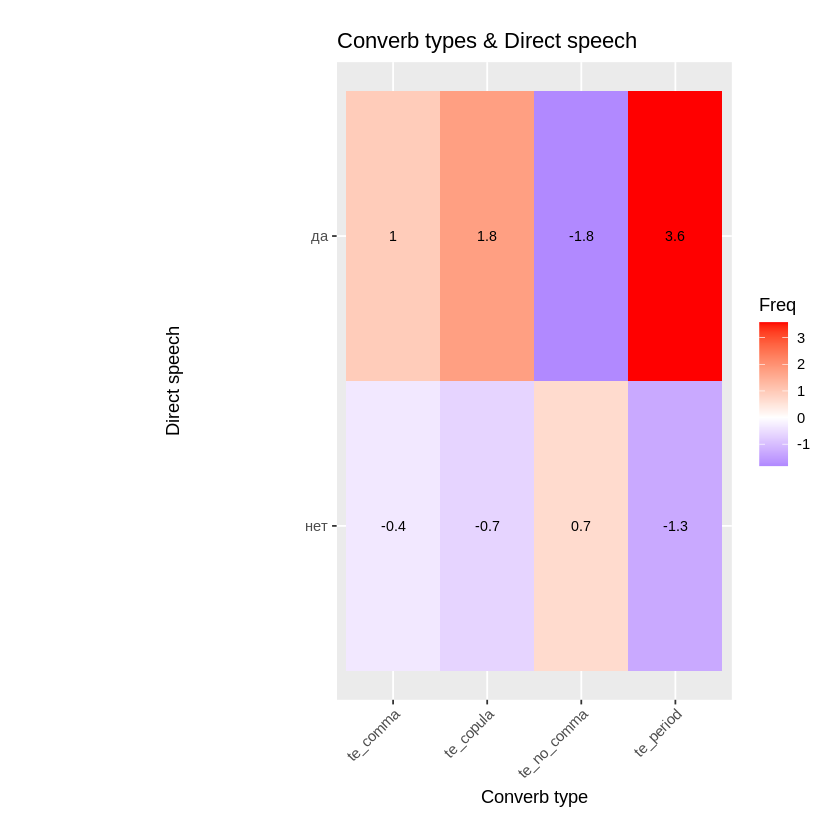

In [203]:
residuals_df <- as.data.frame.table(residuals(chisq.test(contingency_table)))
ggplot(residuals_df, aes(x = Var2, y = Var1, fill = Freq)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white") +
  geom_text(aes(label = round(Freq, 1)), size = 3) +
  labs(title = "Converb types & Direct speech",
       x = "Converb type",
       y = "Direct speech") +
  theme(
  axis.text.x = element_text(angle = 45, hjust = 1),
  axis.title.y = element_text(margin = margin(r = 80)),
  plot.margin = margin(l = 100, r = 10, t = 20, b = 20, unit = "pt")
)

Статистически значимая связь между прямой речью и типом конверба существует, однако она не настолько сильна, как описанные выше корреляции. Наблюдается сильная зависимость между прямой речью и употреблением конверба с точкой. Также стоит принять во внимание, что в датасете наблюдается сильный перевес в сторону недиалогических контекстов.

# Модель: дерево решений

Обучим дерево решений для задачи предсказания типа конверба - te с запятой или без запятой - по всем остальным характеристикам.

In [243]:
data_clean <- data_one %>%
  mutate(direct_speech = recode(direct_speech, "да" = "1", "нет" = "0"))

Будем принимать во внимание следующие характеристики: наличие конверба на -i, количество конвербов в цепочке, какие именно конвербы в цепочке, диалогические контексты, тип связи, оригинальный союз и тип маркирования подлежащего.

In [244]:
data_clean <- data_clean %>%
  mutate(
    target = as.factor(ifelse(converb_te_comma == 1, "comma", "no_comma")),
    across(where(is.character), ~fct_lump_min(factor(.), min = threshold)),
    across(where(is.factor), ~fct_drop(.))
  ) %>%
  select(-starts_with("converb_te_")) %>%
  filter(complete.cases(.)) %>%
  select(-nearZeroVar(., names = TRUE))
data_clean <- data_clean %>%
  select(-connection_type_en)
str(data_clean)

tibble [248 × 8] (S3: tbl_df/tbl/data.frame)
 $ converb_i           : num [1:248] 0 0 0 1 0 1 0 1 0 0 ...
 $ converbs_amount     : num [1:248] 1 1 1 2 1 3 1 2 1 1 ...
 $ types_of_converbs   : Factor w/ 4 levels "И, ТЭ","ТЭ","ТЭ, И",..: 2 2 2 1 2 4 2 3 2 2 ...
 $ direct_speech       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ connection_type_ja  : Factor w/ 6 levels "образ действия",..: 4 2 2 3 4 3 3 3 1 1 ...
 $ conjunction_original: Factor w/ 7 levels "-","and","ing",..: 7 2 2 2 2 2 2 2 4 7 ...
 $ subject             : Factor w/ 4 levels "[(te), (2)]",..: 2 2 2 2 3 2 2 2 2 2 ...
 $ target              : Factor w/ 2 levels "comma","no_comma": 2 1 2 1 1 1 1 2 2 2 ...


Всего у нас 97 вхождений с запятой и 151 вхождение без запятой. Сильный дисбаланс классов не наблюдается.

In [249]:
table(data_clean$target)


   comma no_comma 
      97      151 

In [245]:
data_clean <- data_clean %>%
  mutate(
    target = factor(target),
    target = make.names(target) %>% factor()
  )

In [246]:
ctrl <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary
)

Модель верно предсказывает класс (-te с запятой или без запятой) в 69.4% случаев. Ложные предсказания -te с запятой составили 16.1%, пропущенные предсказания составили 14.5%. Наиболее важные признаки, влияющие на разбиение узлов, указаны в схеме ниже.

            cp       ROC      Sens      Spec      ROCSD    SensSD     SpecSD
1  0.000000000 0.7379892 0.6294737 0.7348387 0.06097316 0.1340737 0.06344815
2  0.008591065 0.7314519 0.6194737 0.7483871 0.05391232 0.1243487 0.07646137
3  0.017182131 0.7325045 0.6194737 0.7683871 0.05487872 0.1243487 0.04575645
4  0.025773196 0.7325045 0.6194737 0.7683871 0.05487872 0.1243487 0.04575645
5  0.034364261 0.7325045 0.6194737 0.7683871 0.05487872 0.1243487 0.04575645
6  0.042955326 0.7325045 0.6194737 0.7683871 0.05487872 0.1243487 0.04575645
7  0.051546392 0.7283393 0.6194737 0.7552688 0.05254594 0.1243487 0.05854343
8  0.060137457 0.7283393 0.6194737 0.7552688 0.05254594 0.1243487 0.05854343
9  0.068728522 0.6739007 0.5205263 0.7552688 0.08860589 0.2587151 0.13777840
10 0.077319588 0.6739007 0.5205263 0.7552688 0.08860589 0.2587151 0.13777840
Cross-Validated (5 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction comma no_comma

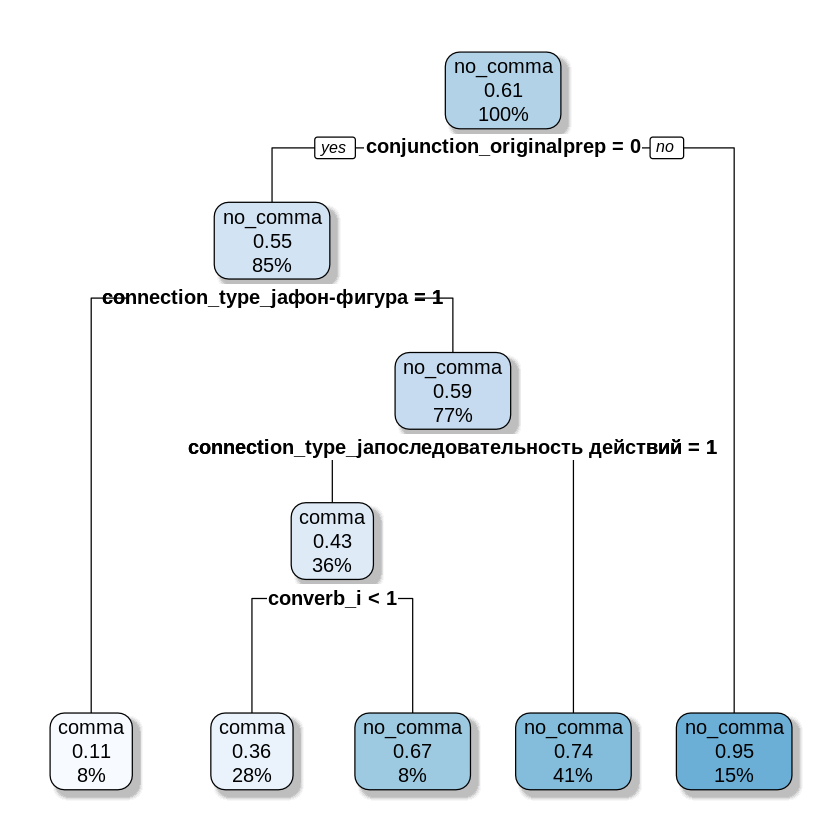

In [257]:
tryCatch({
  tree_model <- train(
    target ~ .,
    data = data_clean,
    method = "rpart",
    trControl = ctrl,
    tuneLength = 10,
    metric = "ROC"
  )

  print(tree_model$results)
  print(confusionMatrix(tree_model))

  rpart.plot(tree_model$finalModel,
           box.palette = "Blues",
           shadow.col = "gray")
})

График ниже показывает, что ведущие к наибольшему уменьшению ошибки характеристики - это тип связи (последовательность действий и фон-фигура), количество конвербов в цепочке и предложная конструкция на месте конверба в английском оригинале.

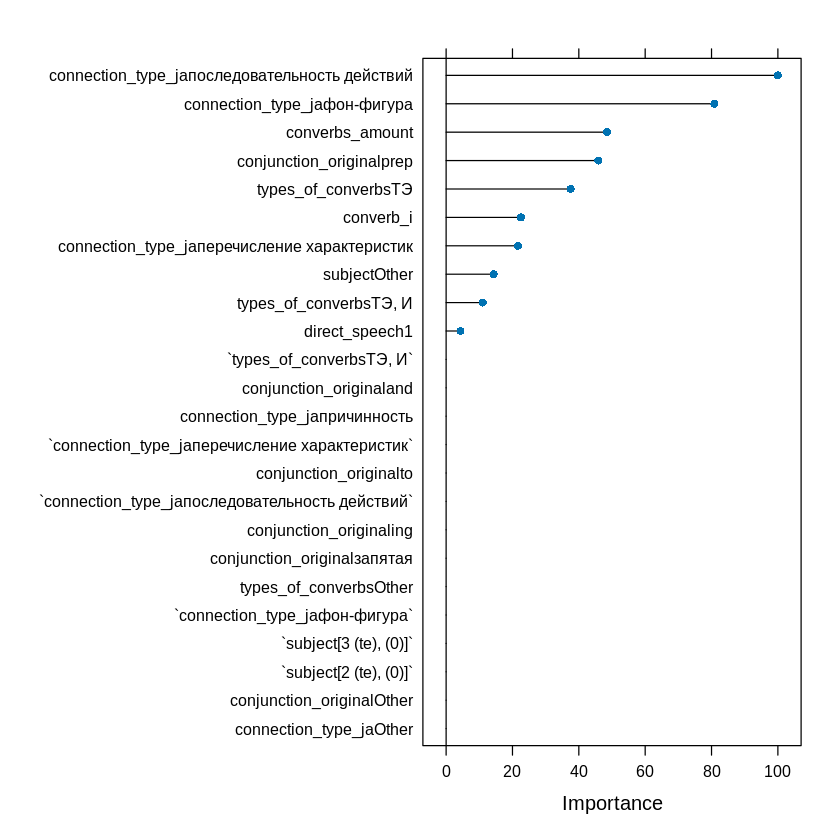

In [254]:
varImpPlot <- varImp(tree_model)
plot(varImpPlot)

График ниже показывает, как меняется соотношение TP / (TP + FN) по оси абсцисс и FP / (FP + TN) по оси ординат. Кривая проходит выше диагонали, следовательно, модель справляется лучше случайных предсказаний.

Setting levels: control = comma, case = no_comma

Setting direction: controls > cases



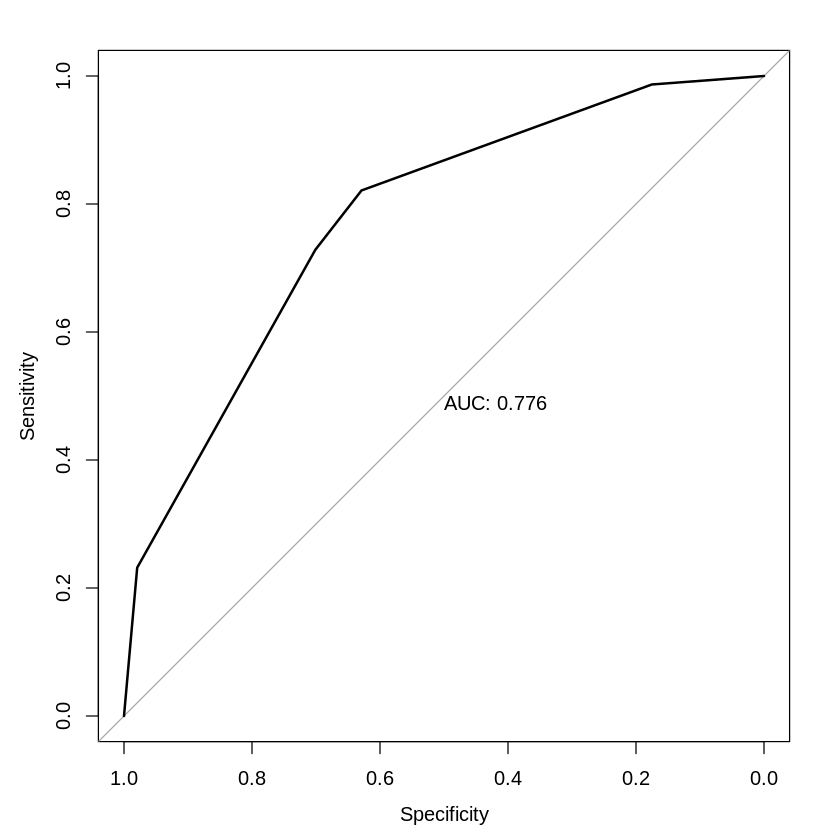

In [259]:
prob <- predict(tree_model, data_clean, type = "prob")[, "comma"]
roc_curve <- roc(data_clean$target, prob)
plot(roc_curve, print.auc = TRUE)

# Модель: бинарная логистическая регрессия

In [262]:
ctrl <- trainControl(
  method = "cv",
  number = 5,
  classProbs = TRUE,
  summaryFunction = twoClassSummary
)

In [263]:
logit_model <- train(
  target ~ .,
  data = data_clean,
  method = "glm",
  family = "binomial",
  trControl = ctrl,
  metric = "ROC"
)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


In [270]:
print(logit_model)

Generalized Linear Model 

248 samples
  7 predictor
  2 classes: 'comma', 'no_comma' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 198, 199, 198, 198, 199 
Resampling results:

  ROC        Sens       Spec     
  0.7565823  0.6484211  0.7673118



Точность верных предсказаний составила 74.6%, что превосходит дерево решений. te-форма с запятой была неверно предсказана в 30.7% случаев, при этом реальные вхождения конверба с запятой были пропущены в 37% случаев.  

In [271]:
confusionMatrix(predict(logit_model, data_clean), data_clean$target)

Confusion Matrix and Statistics

          Reference
Prediction comma no_comma
  comma       61       27
  no_comma    36      124
                                         
               Accuracy : 0.746          
                 95% CI : (0.687, 0.7989)
    No Information Rate : 0.6089         
    P-Value [Acc > NIR] : 3.728e-06      
                                         
                  Kappa : 0.4577         
                                         
 Mcnemar's Test P-Value : 0.3135         
                                         
            Sensitivity : 0.6289         
            Specificity : 0.8212         
         Pos Pred Value : 0.6932         
         Neg Pred Value : 0.7750         
             Prevalence : 0.3911         
         Detection Rate : 0.2460         
   Detection Prevalence : 0.3548         
      Balanced Accuracy : 0.7250         
                                         
       'Positive' Class : comma          
                             

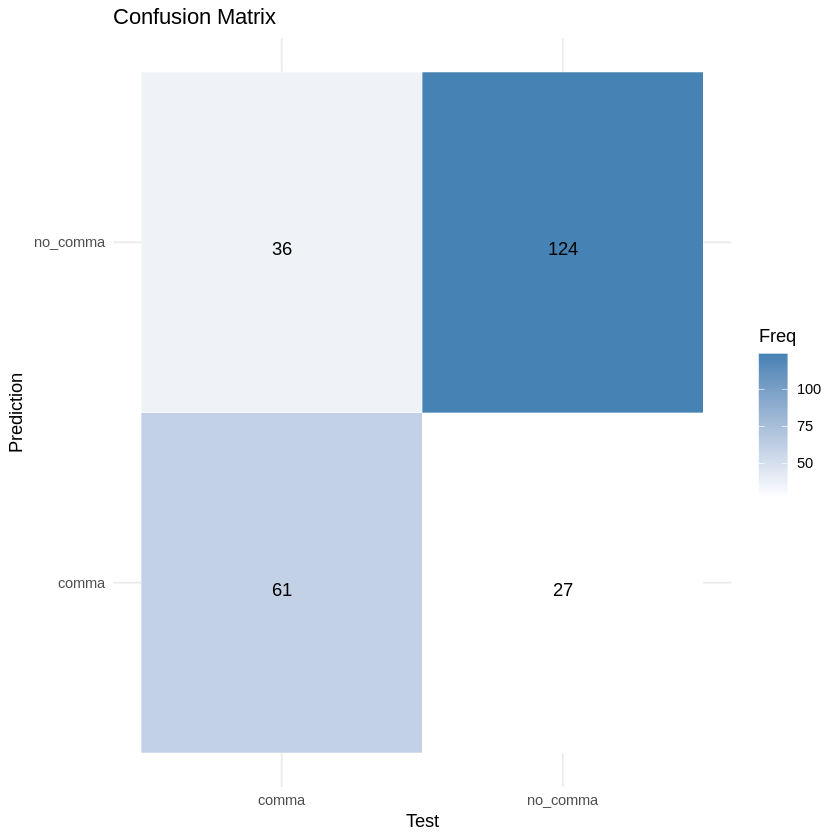

In [273]:
pred <- predict(logit_model, data_clean)
cm <- confusionMatrix(pred, data_clean$target)
cm_data <- as.data.frame(cm$table)
ggplot(cm_data, aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "steelblue") +
  labs(title = "Confusion Matrix",
       x = "Test",
       y = "Prediction") +
  theme_minimal()

Действительно, модель логистической регрессии превосходит дерево решений - roc-auc ближе к единице и составляет 0.823, что на 0.047 лучше roc-auc для дерева решений.

Setting levels: control = comma, case = no_comma

Setting direction: controls > cases



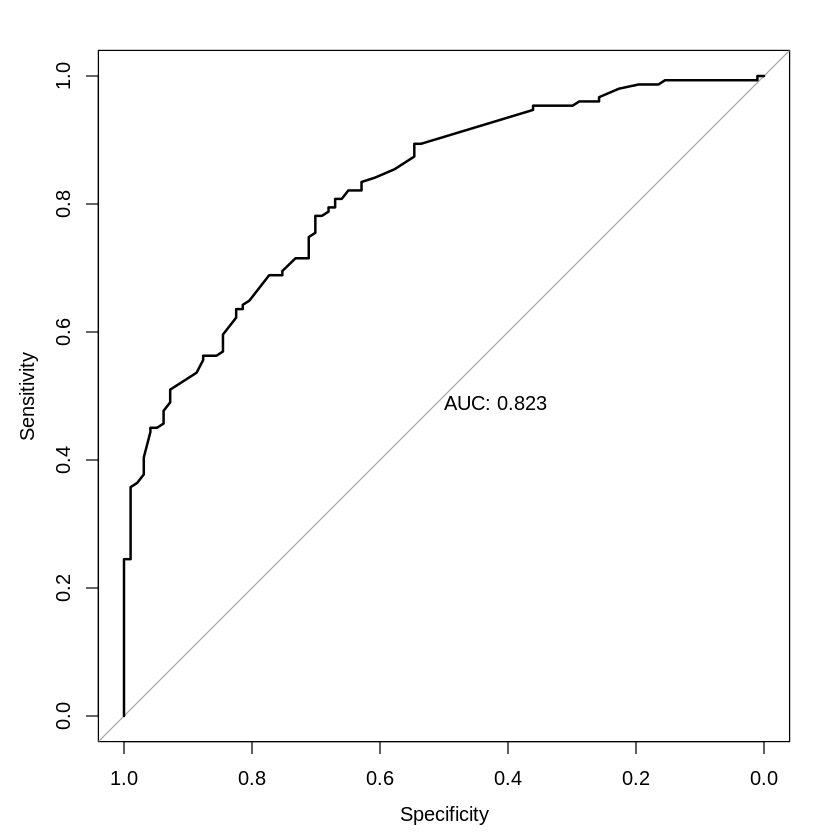

In [266]:
roc_curve <- roc(
  response = data_clean$target,
  predictor = predict(logit_model, type = "prob")[, "comma"]
)
plot(roc_curve, print.auc = TRUE)

Ниже представлены различия двух моделей по метрикам качества по 5 фолдам кросс-валидации. Медиана и среднее значение вычисляются по всем фолдам, 1st Qu. и 3rd Qu. - это 25% и 75% значений соответственно, min и max - минимальное и максимальное значение метрики на одном из фолдов. Sensivity (True Positive Rate) вычисляется как TP / (TP + FN) и указывает на количество верно предсказанных -te с запятой, Specifity (True Negative Rate) вычисляется как TN / (TN + FP) и указывает на количество верно предсказанных -te без запятой.


Call:
summary.resamples(object = resamples)

Models: Дерево_решений, Логистическая_регрессия 
Number of resamples: 5 

ROC 
                             Min.   1st Qu.    Median      Mean   3rd Qu.
Дерево_решений          0.6578947 0.7041667 0.7410866 0.7379892 0.7692982
Логистическая_регрессия 0.7078947 0.7122807 0.7583333 0.7565823 0.7733333
                             Max. NA's
Дерево_решений          0.8175000    0
Логистическая_регрессия 0.8310696    0

Sens 
                             Min.   1st Qu.    Median      Mean   3rd Qu. Max.
Дерево_решений          0.4500000 0.5263158 0.6842105 0.6294737 0.7368421 0.75
Логистическая_регрессия 0.4736842 0.6842105 0.6842105 0.6484211 0.7000000 0.70
                        NA's
Дерево_решений             0
Логистическая_регрессия    0

Spec 
                             Min.   1st Qu.    Median      Mean   3rd Qu.
Дерево_решений          0.6333333 0.7333333 0.7333333 0.7348387 0.7741935
Логистическая_регрессия 0.7000000 0.7000000 0.7666

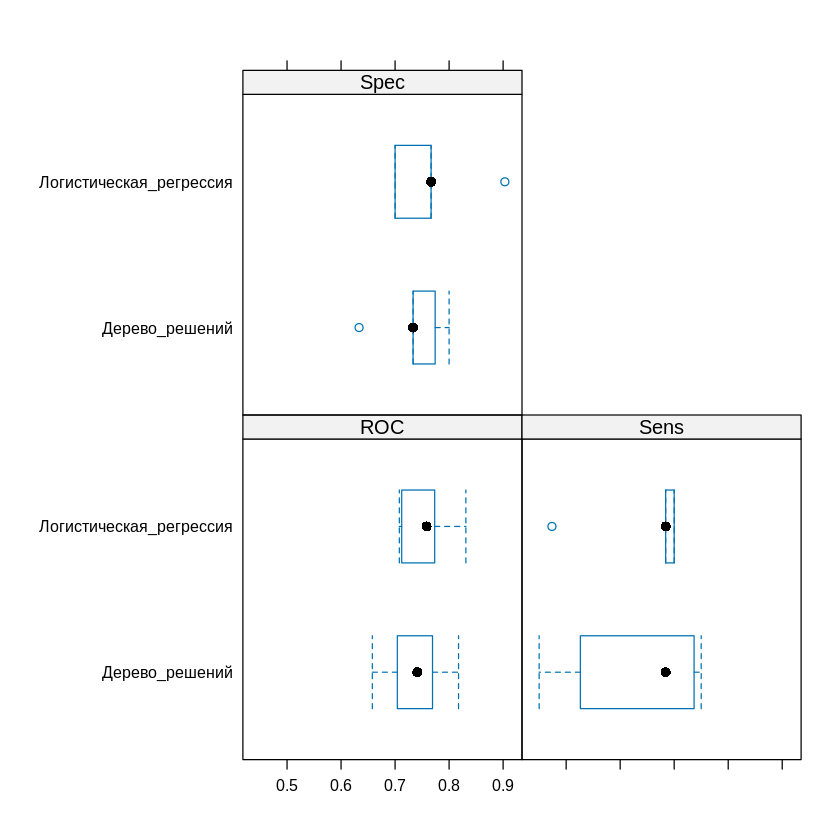

In [269]:
resamples <- resamples(
  list(Дерево_решений = tree_model, Логистическая_регрессия = logit_model)
)
summary(resamples)
bwplot(resamples)

Из метрик и графиков видно, что бинарная логистическая регрессия превзошла дерево решений по точности предсказаний по всем метрикам.

# Выводы

Из пяти глав было собрано 226 предложений (или 248 вхождений -te).

Были выявлены четыре вида употребления конверба с точки зрения пунктуационной реализации: te с запятой (от прилагательного/глагола), te без запятой (от прилагательного/глагола), te от вспомогательной связки и te с точкой (т.е. с эллипсисом главной клаузы).

Встречаются шесть основных типов семантики связи клауз, содержащих te: последовательность действий (38.3%), образ действия (35.5%), перечисление характеристик (9.3%), причинность (8.1%), фон-фигура (8.1%) и дискурсивный обрыв (0.8%). Некоторые значения могут сочетаться в пределах одного предложения; самые распространённые сочетания -  образ действия + последовательность действий и фон-фигура + последовательность действий. Остальные сочетания единичны. X-квадрат тест показал, что связь между типом конверба и семантикой связи клауз статистически значима и сильна; так, наблюдается сильная связь между "te с точкой" и "дискурсивным обрывом" и, наоборот, очень слабая связь между "te без запятой" и "фон-фигура".

Что касается аналогичных te средствам связи в английском, всего было выявлено 32 различных аналога. Самые частотные среди них: and (29.8%), отсутствие полипредикации (14.9%), предлог (14.9%), форма на -ing (8.9%) и запятая (6.5%). X-квадрат тест показал, что существует сильная связь между аналогами конверба в оригинальном тексте и пунктуационной реализацией конверба в переводе.

Мы также рассмотрели способы маркирования субъекта в полипредикациях с te. Самые распространённый из них - это вынесенный влево относительно конверба субъект, общий для всей полипредикации, маркированный показателем топика. X-квадрат тест, однако, показал, что на уровне доверия 5% нет статистически значимойй связи между вариантом пунктуационной реализации конверба и способом маркирования подлежащего.

Наконец, мы рассмотрели, влияет ли употребление подлежащего с te в прямой речи персонажей (11.5% от всех примеров) на пунктуационную реализацию конверба. Была обнаружена достаточно слабая корреляция между этими двумя переменными благодаря частому употреблению te с точкой в диалогических контекстах.

В заключение мы решили попробовать обучить две модели, предсказывающие, будет ли конверб употреблён с запятой, по другим характеристикам предложения. Эксперименты показали, что с этой задачей лучше всего справляется бинарная логистическая регрессия, достигающая точности предсказаний в 0.74.


# Перспективы

В будущем планируется увеличить размер выборки и включить в анализ материалы разных жанров - ожидается, что при увеличении количества употреблений в диалогических контекстах можно будет сделать более точные выводы об употреблении конверба с эллипсисом главной клаузы. Также планируется провести анкетирование носителей для выявления прочих различий между употреблениями конверба в разных пунктуационных реализациях.

# Источники

Данилов А., Сыромятников Н. Японский язык. Пунктуация, знаки повтора, вспомогательные пометы. Муравей-Гайд. 2001

Зверев А.С. О сочетаниях запятой с различными единицами синтаксического уровня в японском и русском языках // 言語教育におけるコロケーション―ロシア語と日本語―報告論集.堤正典編. 神奈川大学, с. 43-60. 2019.